## DSC 530 - Final Project

### Michael Ersevim

#### Bellevue University - Fall 2021

In [1]:
%cd   C:/Users/mersevim/ThinkStats2/code

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import thinkplot

In [3]:
df = pd.read_csv(r'C:\Users\mersevim\ThinkStats2\code\DSC530_Final_Proj_DMP_Data.csv')   #read the csv file

In [4]:
df.head()

,Start Eff Date,End Eff Date,Cost,Cnty,State,City,Zip,Svc,Mat,SCode,Mkt,Qty,Cnt per wk,Equip,Size Code,Yd Size,Covid
0,9/1/2020,7/31/2021,48.20,Fayette,KY,LEXINGTON,40511,PCK,T,NaN,Open,1,2,DMP,YRDS-8,8,Post
1,1/1/2021,1/31/2021,48.38,Cobb,GA,SMYRNA,30080,PCK,T,NaN,Open,1,1,DMP,YRDS-2,2,Post
2,3/1/2020,4/30/2021,88.58,Harris,TX,HUMBLE,77346,PCK,T,NaN,Open,1,1,DMP,YRDS-4,4,Pre
3,8/7/2019,9/30/2021,89.88,Polk,FL,LAKELAND,33813,PCK,T,NaN,Open,1,1,DMP,YRDS-4,4,Pre
4,2/19/2021,3/10/2021,146.87,Orange,FL,OCOEE,34761,PCK,T,NaN,Open,1,1,DMP,YRDS-8,8,Post


In [5]:
df.describe

<bound method NDFrame.describe of      Start Eff Date End Eff Date    Cost         Cnty State           City  \
0          9/1/2020    7/31/2021   48.20      Fayette    KY      LEXINGTON   
1          1/1/2021    1/31/2021   48.38         Cobb    GA         SMYRNA   
2          3/1/2020    4/30/2021   88.58       Harris    TX         HUMBLE   
3          8/7/2019    9/30/2021   89.88         Polk    FL       LAKELAND   
4         2/19/2021    3/10/2021  146.87       Orange    FL          OCOEE   
...             ...          ...     ...          ...   ...            ...   
9915     12/18/2020    5/31/2021  220.00  Westchester    NY   MOUNT VERNON   
9916       4/7/2021     5/1/2021  250.00    Sheboygan    WI         KOHLER   
9917       7/1/2021     7/5/2021  211.99    Galveston    TX      GALVESTON   
9918      4/16/2021    4/20/2021  155.00     Richmond    NY  STATEN ISLAND   
9919      10/4/2021    10/4/2021   80.00     Dutchess    NY   DOVER PLAINS   

        Zip  Svc Mat  SCode  

In [6]:
df["UnitCost"] = df["Cost"]/df["Qty"] # define overall unit cost for cases where qty > 1
df.loc[df['Yd Size'] == 2, 'UnitCost-2Yd'] = df["Cost"]/df["Qty"] # define unit cost for 2 yarder
df.loc[df['Yd Size'] == 4, 'UnitCost-4Yd'] = df["Cost"]/df["Qty"] # define unit cost for 4 yarder
df.loc[df['Yd Size'] == 6, 'UnitCost-6Yd'] = df["Cost"]/df["Qty"] # define unit cost for 6 yarder
df.loc[df['Yd Size'] == 8, 'UnitCost-8Yd'] = df["Cost"]/df["Qty"] # define unit cost for 8 yarder

In [7]:
df[["UnitCost","Yd Size"]].groupby("Yd Size").mean()

,UnitCost
Yd Size,
2,149.944853
4,137.569573
6,201.329402
8,286.137484


In [8]:
df[["UnitCost","Cnt per wk"]].groupby("Cnt per wk").mean()

,UnitCost
Cnt per wk,
1,131.207874
2,253.566352
3,361.692578
4,469.849808
5,617.909755
6,928.285050
7,798.540000


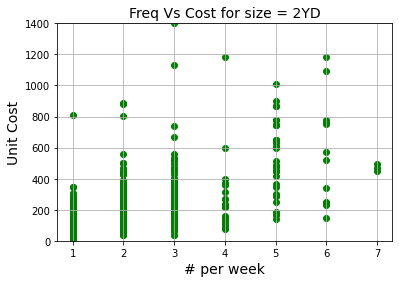

In [9]:
plt.scatter(df['Cnt per wk'], df['UnitCost-2Yd'], color='green')
plt.title('Freq Vs Cost for size = 2YD', fontsize=14)
plt.xlabel('# per week', fontsize=14)
plt.ylabel('Unit Cost', fontsize=14)
plt.ylim([0,1400])
plt.grid(True)
plt.show()

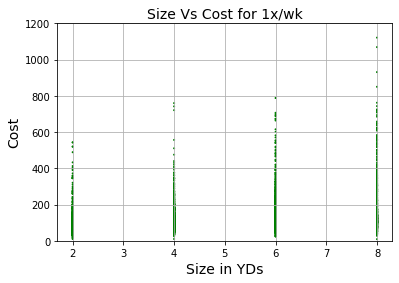

In [10]:
#df.loc[df['Cnt per wk'] == 1, 'Once/Week'] = df["Cnt per wk"] # label common freq
plt.scatter(df['Yd Size'], df['Cost'], df['Cnt per wk'] == 1, color='green')
plt.title('Size Vs Cost for 1x/wk', fontsize=14)
plt.xlabel('Size in YDs', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.ylim([0,1200])
plt.grid(True)
plt.show()

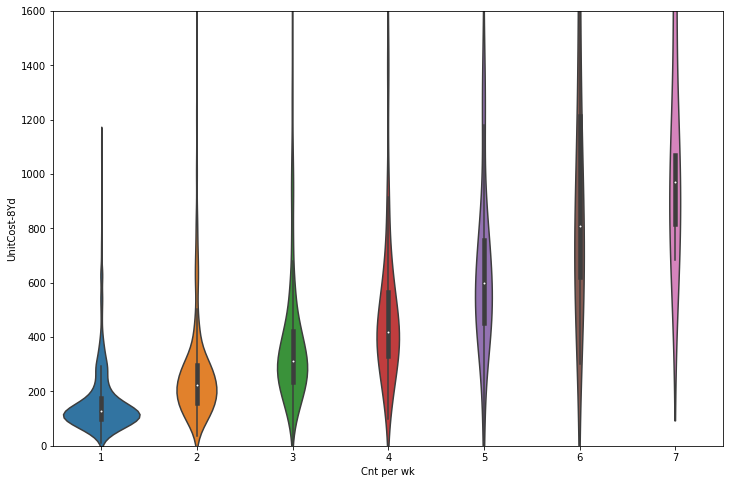

In [11]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)

axes = plt.gca()
axes.set_ylim([0, 1600])

ax = sb.violinplot(x="Cnt per wk", y="UnitCost-8Yd", data=df)

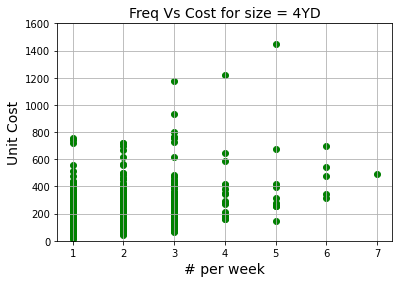

In [12]:
plt.scatter(df['Cnt per wk'], df['UnitCost-4Yd'], color='green')
plt.title('Freq Vs Cost for size = 4YD', fontsize=14)
plt.xlabel('# per week', fontsize=14)
plt.ylabel('Unit Cost', fontsize=14)
plt.ylim([0,1600])
plt.grid(True)
plt.show()

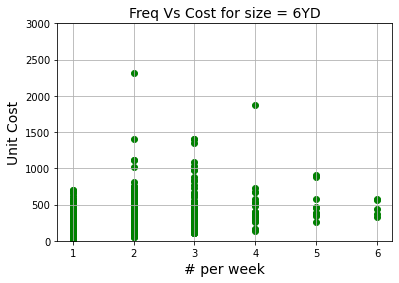

In [13]:
plt.scatter(df['Cnt per wk'], df['UnitCost-6Yd'], color='green')
plt.title('Freq Vs Cost for size = 6YD', fontsize=14)
plt.xlabel('# per week', fontsize=14)
plt.ylabel('Unit Cost', fontsize=14)
plt.ylim([0,3000])
plt.grid(True)
plt.show()

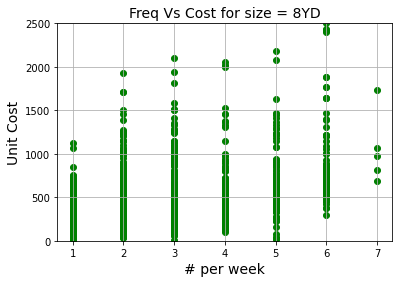

In [14]:
plt.scatter(df['Cnt per wk'], df['UnitCost-8Yd'], color='green')
plt.title('Freq Vs Cost for size = 8YD', fontsize=14)
plt.xlabel('# per week', fontsize=14)
plt.ylabel('Unit Cost', fontsize=14)
plt.ylim([0,2500])
plt.grid(True)
plt.show()

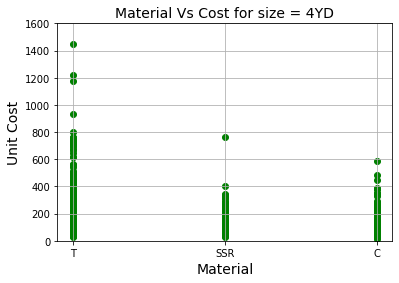

In [15]:
plt.scatter(df['Mat'], df['UnitCost-4Yd'], color='green')
plt.title('Material Vs Cost for size = 4YD', fontsize=14)
plt.xlabel('Material', fontsize=14)
plt.ylabel('Unit Cost', fontsize=14)
plt.ylim([0,1600])
plt.grid(True)
plt.show()

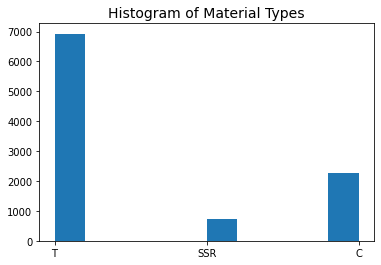

In [16]:
plt.title('Histogram of Material Types', fontsize=14)
plt.hist(df["Mat"])
plt.show()

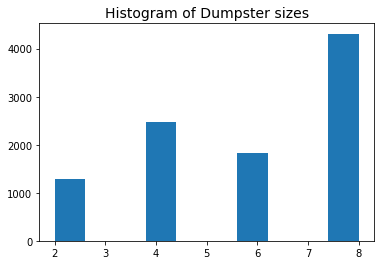

Average Yard size is 5.846370967741936


In [17]:
plt.title('Histogram of Dumpster sizes', fontsize=14)
plt.hist(df["Yd Size"])
plt.show()
print("Average Yard size is",df['Yd Size'].mean())

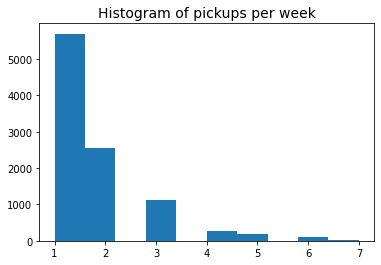

Average pickups per week is 1.6940524193548387


In [18]:
plt.title('Histogram of pickups per week', fontsize=14)
plt.hist(df["Cnt per wk"])
plt.show()
print("Average pickups per week is",df['Cnt per wk'].mean())

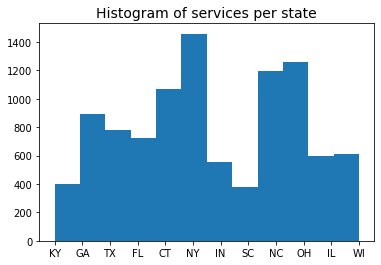

In [19]:
plt.title('Histogram of services per state', fontsize=14)
plt.hist(df["State"], bins = 12)
plt.show()

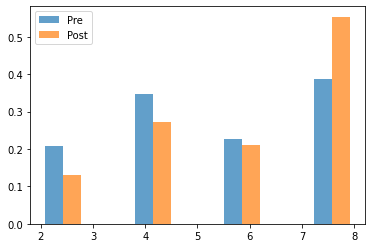

Avg Size Pre-Covid is 5.3610108303249095
Avg Size Post-Covid is 6.0344055944055945


In [20]:

df.loc[df['Covid'] =='Pre', 'Pre'] = df["Yd Size"] # define
df.loc[df['Covid'] =='Post', 'Post'] = df["Yd Size"] # define
x = df['Pre']
y = df['Post']

bins = np.linspace(2, 8, 8)

plt.hist([x,y], bins, density=True, alpha=0.7, label=['Pre','Post'])
plt.legend(loc='upper left')
plt.show()
print("Avg Size Pre-Covid is",df['Pre'].mean())
print("Avg Size Post-Covid is",df['Post'].mean())

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.13393964e-04, 4.13393964e-04, 4.13393964e-04, 4.13393964e-04,
        4.13393964e-04, 4.13393964e-04, 4.13393964e-04, 4.13393964e-04,
        4.13393964e-04, 4.13393964e-04, 4.13393964e-04, 4.13393964e-04,
        4.13393964e-04, 4.13393964e-04, 4.13393964e-04, 8.26787929e-04,
        8.26787929e-04, 8.26787929e-04, 8.26787929e-04, 8.26787929e-04,
        2.06696982e-03, 2.06696982e-03, 2.06696982e-03, 2.06696982e-03,
        2.06696982e-03, 5.37412154e-03, 5.37412154e-03, 5.78751550e-03,
        7.02769740e-03, 7.44109136e-03, 8.68127325e-03, 9.50806118e-03,
        1.07482431e-02, 1.07482431e-02, 1.28152129e-02, 1.40553948e-02,
        1.52955767e-02, 1.65357586e-02, 2.06696982e-02, 2.39768499e-02,
        2.48036379e-02, 2.97643654e-02, 3.59652749e-02, 3.76188508e-02,
        4.05126085e-02, 4.34063663e-02, 4.83670938e-02, 5.12608516e-02,
        5.87019430e-02, 6.15957007e-02, 6.69698222e-02, 7.39975196e-02,
        8.22653989e-02, 8.76395205e-02, 9.34270360e-02, 1.000413

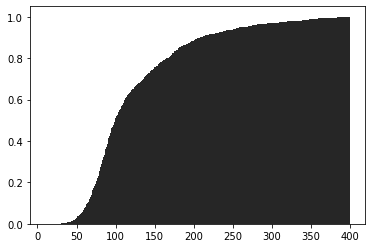

In [21]:
plt.hist(df['UnitCost-4Yd'], density=True, bins=400, cumulative=True, range=[10, 400], label='CDF',
          alpha=0.85, color='k')

In [22]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Yd Size','Cnt per wk']] # 2 variables = multiple regression.
Y = df['UnitCost']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -65.6707297691556
Coefficients: 
 [ 13.80120754 118.36070236]


In [23]:
# prediction with sklearn
New_Size = 4
New_Cnt = 2
print ('Predicted service cost: \n', regr.predict([[New_Size , New_Cnt]]))
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Predicted service cost: 
 [226.25550511]
                            OLS Regression Results                            
Dep. Variable:               UnitCost   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2316.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:                -66333.
No. Observations:                9920   AIC:                         1.327e+05
Df Residuals:                    9917   BIC:                         1.327e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [24]:
from scipy.stats import ttest_ind
df.head()
a=df['Pre'].dropna(axis='rows')
b=df['Post'].dropna(axis='rows')
ttest_ind(a, b)

Ttest_indResult(statistic=-13.856724775539975, pvalue=2.9273274259239605e-43)